#### 1.Use Pandas to read the file census_costs.txt file

In [44]:
import pandas as pd

#### 2.Find out how many rows and columns it has

In [45]:
df= pd.read_csv("/content/census_costs.txt",sep="\t")
df

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [46]:
df.shape

(23, 4)

#### 3.Display first 10, last 10, and random 10 rows

In [47]:
df.head(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [48]:
df.tail(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
13,1920,"105,710,620","$25,117,000",23.76 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
18,1970,"203,302,031","$247,653,000",$1.22
19,1980,"226,542,199","$1,078,488,000",$4.76
20,1990,"248,718,301","$2,492,830,000",$10.02
21,2000,"281,421,906",$4.5 Billion,$15.99
22,2010*,"308,745,538",$13 Billion,$42.11


#### 4.Find out the data types of all columns - use info() function

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Census Year              23 non-null     object
 1   Total Population         23 non-null     object
 2   Census Cost              23 non-null     object
 3   Average Cost Per Person  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


#### 5.Find out the summary statistics of all columns

In [50]:
df.describe(include='all')

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23,23,23,23
unique,23,23,23,23
top,1790,"3,929,214","$44,377",1.13 cents
freq,1,1,1,1


#### 6.Cleanse the data to make the year, population, cost, cost per person numerical type - use apply() function

In [89]:
def cleanse_data(values):
    data1 = str(values).replace("*","").replace(",","").replace("$","").replace("\t","")
    return data1

In [148]:
# finding the number of billions
for values in df["Census Cost"]:
  if "Billion" in values :
    values = str(values).replace(" Billion","")
    values = float(str(values).replace("$",""))
    values = int(values)  * 1000000000
    print(values)

  elif "Billion" not in values:
    values = str(values).replace("$","")
    values = float(str(values).replace(",",""))
    values = int(values)
    values = values
    print(values)   

44377
66109
178445
208526
378545
833371
1423351
1969377
3421198
5790678
11547127
11854000
15968000
25117000
40156000
67527000
91462000
127934000
247653000
1078488000
2492830000
4000000000
13000000000


In [161]:
def clean_census_cost(values):
  if "Billion" in values :
    values = str(values).replace(" Billion","")
    values = float(str(values).replace("$",""))
    values = int(values)  * 1000000000

  elif "Billion" not in values:
    values = str(values).replace("$","")
    values = float(str(values).replace(",",""))
    values = int(values)
    values = values
  return values

In [175]:
def clean_avg_cost(values):
  if 'cents' in values:
    values = float(str(values).replace(" cents", ""))
    values = round(float(values/ 100), 4)

  elif "$" in values:
    values = float(str(values).replace("$", ""))
    values = round(float(values/ 100), 4)

  return values

In [176]:
df["Census Year"] = df["Census Year"].apply(cleanse_data)
df['Census Year'] = pd.to_numeric(df['Census Year'])

In [177]:
df["Total Population"] = df["Total Population"].apply(cleanse_data)
df['Total Population'] = pd.to_numeric(df['Total Population'])

In [178]:
df["cost_census"] = df["Census Cost"].apply(clean_census_cost)
df["avg_person"] = df["Average Cost Per Person"].apply(clean_avg_cost)
df

,Census Year,Total Population,Census Cost,Average Cost Per Person,cost_census,avg_person
0,1790,3929214,"$44,377",1.13 cents,44377,0.0113
1,1800,5308483,"$66,109",1.24 cents,66109,0.0124
2,1810,7239881,"$178,445",2.46 cents,178445,0.0246
3,1820,9633822,"$208,526",2.16 cents,208526,0.0216
4,1830,12866020,"$378,545",2.94 cents,378545,0.0294
5,1840,17069458,"$833,371",4.88 cents,833371,0.0488
6,1850,23191876,"$1,423,351",6.14 cents,1423351,0.0614
7,1860,31443321,"$1,969,377",6.26 cents,1969377,0.0626
8,1870,38558371,"$3,421,198",8.87 cents,3421198,0.0887
9,1880,50155783,"$5,790,678",11.54 cents,5790678,0.1154


#### 7.Find out the summary statistics of the numerical columns - use describe() function

In [179]:
df.describe()

,Census Year,Total Population,cost_census,avg_person
count,23.0000,2.300000e+01,2.300000e+01,23.000000
mean,1900.0000,1.039211e+08,9.228196e+08,0.179217
std,67.8233,9.622629e+07,2.803278e+09,0.202004
min,1790.0000,3.929214e+06,4.437700e+04,0.011300
25%,1845.0000,2.013067e+07,1.128361e+06,0.038500
50%,1900.0000,7.630339e+07,1.185400e+07,0.100200
75%,1955.0000,1.653245e+08,1.096980e+08,0.210450
max,2010.0000,3.087455e+08,1.300000e+10,0.713400


#### 8.Use Pandas built-in plotting function to plot the average cost per person over time.

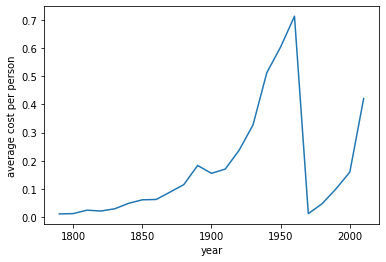

In [190]:
import matplotlib.pyplot as plt
x=df['Census Year']
y=df['avg_person']
plt.plot(x,y)
plt.xlabel('year')
plt.ylabel('average cost per person')
plt.show()

#### 9.Use Pandas built-in plotting function to plot the scatter plot of Total Population vs Total Cost.

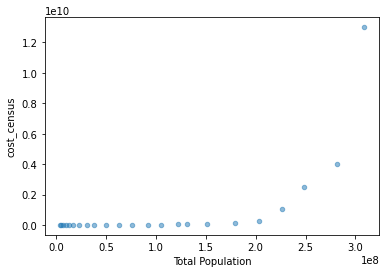

In [194]:
df.plot.scatter(x="Total Population", y="cost_census", alpha=0.5)